# Details

This notebook contains data cleaning and feature engineering efforts.

At the bottom I dummified the categorical variables. I then ran multiple linear regression with all data points included and then tried out simpler models with R-type equations. Finally, I ran Lasso regression on the full data set to examine which predictors fell to zero first.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
#optional to allow for complete inspection of items
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
#Original data set without address and lat and long
ahp = pd.read_csv('Ames_HousePrice.csv')

In [5]:
ahp.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   
4         70.0     8400   Pave   NaN      Reg         Lvl    AllPub    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl        SWISU       Norm       Norm     1Fam     1Story   
1       Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3       Gtl      OldTown       Norm       Norm     1Fam     2Story   
4       Gtl       NWAmes       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            9       1930          2007       Hip  CompShg   
3            4            8       1900          2003     Gable  CompShg   
4            8            6       2001          2001     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        Gd   
4     VinylSd     VinylSd       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     BrkTil       TA       TA           No          ALQ       737.0   
3     BrkTil       Fa       TA           No          Unf         0.0   
4      PConc       Gd       TA           No          GLQ       643.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          Unf         0.0      100.0        837.0    GasA        Ex   
3          Unf         0.0      405.0        405.0    GasA        Gd   
4          Unf         0.0      167.0        810.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1001         0             0           0.0   
3          Y      SBrkr       717       322             0           0.0   
4          Y      SBrkr       810       855             0           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         1         0             2             1          Gd   
3           0.0         1         0             2             1          TA   
4           0.0         2         1             3             1         

# Cleaning LotFrontage

I calculated the median length for each lot (separately for each Lot Config) where Lot Frontage was not null by dividing lot area by Lot frontage. 

Length * Width (i.e.Lot Frontage)=Lot Area.


I then imputed Lot Frontage for those where it was null by Dividing Lot Area by the median lot length for the matching Lot Config.

In [5]:
ahp.loc[((ahp['LotConfig']=='Inside')&(ahp['LotArea'].isna()==False)&(ahp['LotFrontage'].isna()==False))]

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
1              2  905476230       1049     139500         120       RL   
2              3  911128020       1001     124900          30  C (all)   
4              5  534177230       1665     227000          60       RL   
6              7  902135020        936      93000          20       RM   
7              8  528228540       1246     187687          20       RL   
9             10  908186050       1072     140000         180       RM   
10            11  528186170       1342     219500         120       RL   
11            12  923426070       1274     136000          60       RL   
14            15  907405020       1536     214000          20       RL   
15            16  531382110       1680     163000          60       RL   
16            17  906380120       1274     203000          20       RL   
17            18  909101060        864      67000          30       RL   
19            20  923252075       1091     131250          80       RL   
20            21  531376060       1486     181000          20       RL   
21            22  902201120        789     115000          20       RM   
22            23  923228080       1092      98000         160       RM   
24            25  527451330       1092     105500         160       RM   
25            26  528218100       1458     168165          60       RL   
26            27  916386140       1466     201000          20       RL   
29            30  528106110       2046     450000          20       RL   
30            31  902206260        886      91300          30       RM   
31            32  528222090       1258     173500          20       RL   
33            34  903400180       1848     207000          50       RL   
34            35  535453210       1269     155000          20       RL   
36            37  907181090       1749     196000          60       RL   
37            38  902206020        492      61500          30       RM   
39            40  527455250        988     129250          20       RL   
44            45  535379110       1534     148000          70       RL   
46            47  528235160       1959     215000          60       RL   
47            48  905478030       1716     131000          50       RL   
48            49  902106130        936     109500          30       RM   
50            51  909176170       2592     150000          90       RL   
51            52  533206070       1565     193800         120       FV   
52            53  527302020       1868     178000          80       RL   
54            55  904301060       1200     179000          90       RL   
57            58  534429130       1248     151500          20       RL   
58            59  528365060       2418     341000          60       RL   
60            61  910203100        672      72000          30       RM   
61            62  905451390       1626     154000          50       RL   
63            64  528118030       2748     390000          60       RL   
65            66  528164060       2470     615000          20       RL   
67            68  528186180       1324     254000         120       RL   
68            69  909250060       2447     169000          50       RL   
69            70  528315060       2199     284500          75       RL   
70            71  528231020       1374     184500          80       RL   
71            72  528456230       1335     210400          20       FV   
72            73  907180120       1588     214000          20       RL   
73            74  911370410       1652     392500         120       RM   
75            76  528222050       1412     156932          60       RL   
78            79  527451410       1092      88000         160       RM   
81            82  535453020       1256     159000          20       RL   
82            83  535379100       1130     120000          30       RL   
84            85  905201110       1188     185000          20       RL   
85        

In [6]:
ahp['LotConfig'].unique()

array(['Corner', 'Inside', 'FR2', 'CulDSac', 'FR3'], dtype=object)

In [20]:
sum(ahp['LotFrontage'].isna())

3

<AxesSubplot:>

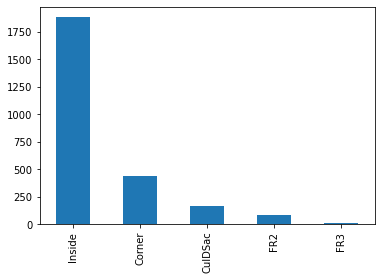

In [8]:
ahp['LotConfig'].value_counts().plot(kind='bar')

In [9]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean:  137.57221997359383
Median:  128.7741935483871
Standard Deviation:  63.263512314169006


In [38]:
ahp[(ahp['LotConfig']=='Inside') & (ahp['LotFrontage'].isna())]

Empty DataFrame
Columns: [Unnamed: 0, PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

In [10]:
ahp.loc[ahp['LotConfig']=='Inside','LotFrontage']=\
ahp.loc[ahp['LotConfig']=='Inside','LotFrontage'].fillna((round(ahp['LotArea']/128)))

In [12]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 121-124 for corner
print('Mean Corner: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median Corner: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation Corner: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean Corner:  124.2385928880386
Median Corner:  121.68031674208146
Standard Deviation Corner:  26.92939927628017


In [13]:
ahp.loc[ahp['LotConfig']=='Corner','LotFrontage']=\
ahp.loc[ahp['LotConfig']=='Corner','LotFrontage'].fillna(round(ahp['LotArea']/121))

In [15]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean CulDSac: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median CulDSac: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation CulDSac: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean CulDSac:  272.4834982635029
Median CulDSac:  247.26190476190476
Standard Deviation CulDSac:  177.93762237026547


In [16]:
ahp.loc[ahp['LotConfig']=='CulDSac','LotFrontage']=\
ahp.loc[ahp['LotConfig']=='CulDSac','LotFrontage'].fillna(round(ahp['LotArea']/247))

In [18]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean FR2: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median FR2: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation FR2: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean FR2:  165.48439689350496
Median FR2:  141.43287037037038
Standard Deviation FR2:  75.66351898940025


In [19]:
ahp.loc[ahp['LotConfig']=='FR2','LotFrontage']=\
ahp.loc[ahp['LotConfig']=='FR2','LotFrontage'].fillna(round(ahp['LotArea']/141))

In [21]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean FR3: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median FR3: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation FR3: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean FR3:  119.76491007437089
Median FR3:  122.82857142857142
Standard Deviation FR3:  28.002270156258174


In [22]:
ahp.loc[ahp['LotConfig']=='FR3','LotFrontage']=\
ahp.loc[ahp['LotConfig']=='FR3','LotFrontage'].fillna(round(ahp['LotArea']/123))

In [23]:
ahp.isna().sum()

Unnamed: 0          0
PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical

# New Features

In [24]:
#price per square foot ground level and above living area
ahp['price_sfgr']=ahp['SalePrice']/ahp['GrLivArea']

In [25]:
#price per square foot including basement
ahp['price_sf']=ahp['SalePrice']/(ahp['GrLivArea']+ahp['TotalBsmtSF'])

In [26]:
#percent 1st floor
ahp['perc_1stflr']=ahp['1stFlrSF']/ahp['GrLivArea']

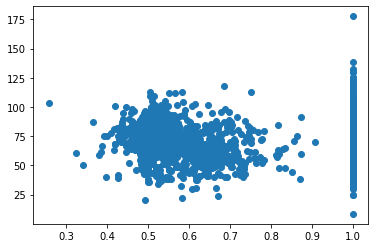

In [27]:
plt.scatter(ahp['perc_1stflr'],ahp['price_sf'])

In [28]:
#percent of lot occupied by house
ahp['house_footprint']=ahp['1stFlrSF']/ahp['LotArea']

In [29]:
#fill in null values in GarageArea
ahp['GarageArea'].fillna(0,inplace=True)

In [30]:
#percent of lot occupied by house and garage
ahp['house_ga_footprint']=(ahp['GarageArea']+ahp['1stFlrSF'])/ahp['LotArea']

/Users/jamesreno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='house_ga_footprint', ylabel='SalePrice'>

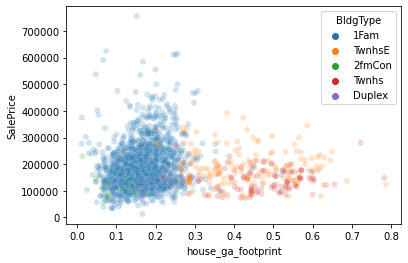

In [31]:
#plt.scatter(ahp['house_footprint'],ahp['SalePrice'],c=ahp['BldgType'])
sns.scatterplot(ahp['house_ga_footprint'],ahp['SalePrice'],hue=ahp['BldgType'],alpha=0.2)

In [32]:
#Approximate room size, Quality * SF, Cond*SF
ahp['RoomSize']=ahp['GrLivArea']/ahp['TotRmsAbvGrd']
ahp['QualXSF']=ahp['GrLivArea']*ahp['OverallQual']
ahp['CondXSF']=ahp['GrLivArea']*ahp['OverallCond']

<AxesSubplot:ylabel='SalePrice'>

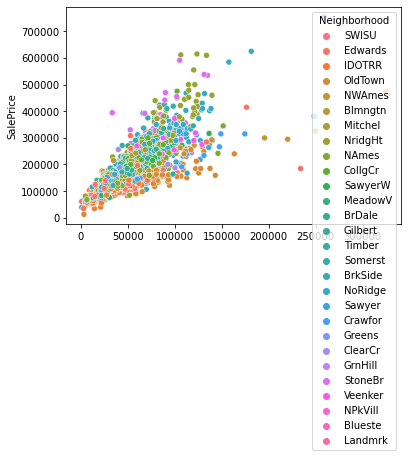

In [33]:
#examining condition*quality*sf
sns.scatterplot(x=(ahp['CondXSF']*ahp['OverallQual']),y=ahp['SalePrice'],hue=ahp['Neighborhood'])

<AxesSubplot:xlabel='QualXSF', ylabel='SalePrice'>

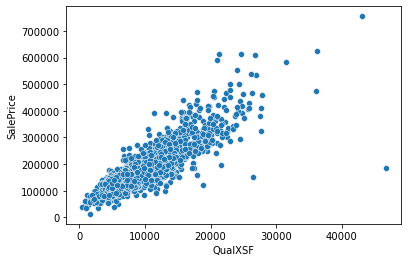

In [34]:
#prettiest of all the correlations
sns.scatterplot(x=ahp['QualXSF'],y=ahp['SalePrice'])

<AxesSubplot:xlabel='RoomSize', ylabel='SalePrice'>

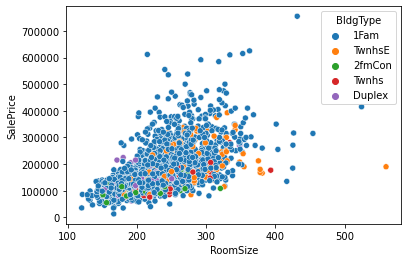

In [35]:
sns.scatterplot(x=ahp['RoomSize'],y=ahp['SalePrice'],hue=ahp['BldgType'])

In [ ]:
#No cases where BsmtFinType1 and Type2 are both the same except when UNF
#checking before creating SF for each basement fin type
ahp.loc[ahp['BsmtFinType2']==ahp['BsmtFinType1']][['BsmtFinType2','BsmtFinType1']]

In [79]:
#all NAs for BSMTFinType1 have 0 total sf of basement - so filling in 0 for na
ahp[ahp['BsmtFinType1'].isna()==False][['BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtGLQSF','BsmtUnfSF','TotalBsmtSF']]

BsmtFinType1 BsmtFinType2  BsmtFinSF1  BsmtFinSF2  BsmtGLQSF  BsmtUnfSF  \
0             Rec          Unf       238.0         0.0        0.0      618.0   
1             GLQ          ALQ       552.0       393.0      552.0      104.0   
2             ALQ          Unf       737.0         0.0        0.0      100.0   
3             Unf          Unf         0.0         0.0        0.0      405.0   
4             GLQ          Unf       643.0         0.0      643.0      167.0   
6             Unf          Unf         0.0         0.0        0.0      936.0   
7             Unf          Unf         0.0         0.0        0.0     1146.0   
8             ALQ          Unf       647.0         0.0        0.0      217.0   
9             GLQ          Unf       467.0         0.0      467.0       80.0   
10            GLQ          Unf        24.0         0.0       24.0     1318.0   
11            Rec          Unf       458.0         0.0        0.0      166.0   
12            Unf          Unf         0.0         0.0        0.0      861.0   
13            BLQ          Unf       609.0         0.0        0.0      785.0   
14            GLQ          Unf       810.0         0.0      810.0      726.0   
15            GLQ          Unf       602.0         0.0      602.0      284.0   
16            GLQ          Unf       925.0         0.0      925.0      349.0   
17            BLQ          Unf        41.0         0.0        0.0      823.0   
18            ALQ          Unf      1200.0         0.0        0.0      410.0   
19            Rec          GLQ       114.0       270.0      270.0        0.0   
20            Unf          Unf         0.0         0.0        0.0     1461.0   
21            ALQ          BLQ       104.0       169.0        0.0      516.0   
22            GLQ          Unf       358.0         0.0      358.0      188.0   
23            Unf          Unf         0.0         0.0        0.0     1240.0   
24            Rec          Unf       300.0         0.0        0.0      225.0   
25            Unf          Unf         0.0         0.0        0.0      608.0   
26            GLQ          Unf        16.0         0.0       16.0     1450.0   
27            GLQ          Unf       378.0         0.0      378.0      378.0   
28            ALQ          BLQ       859.0        32.0        0.0      216.0   
29            GLQ          Unf      1430.0         0.0     1430.0      564.0   
30            Unf          Unf         0.0         0.0        0.0      190.0   
31            Unf          Unf         0.0         0.0        0.0     1246.0   
32            Unf          Unf         0.0         0.0        0.0     1324.0   
33            Unf          Unf         0.0         0.0        0.0      833.0   
34            BLQ          LwQ       374.0       532.0        0.0      363.0   
35            GLQ          Unf        78.0         0.0       78.0     1258.0   
36            GLQ          Unf       500.0         0.0      500.0      342.0   
37            LwQ          Unf       416.0         0.0        0.0       76.0   
38            LwQ          Unf       156.0         0.0        0.0      692.0   
39            BLQ          Unf       725.0         0.0        0.0      263.0   
40            Unf          Unf         0.0         0.0        0.0     1519.0   
41            ALQ          Unf       336.0         0.0        0.0      748.0   
42            BLQ          Unf       637.0         0.0        0.0      675.0   
43            ALQ          Unf       181.0         0.0        0.0      744.0   
44            Unf          Unf         0.0         0.0        0.0      736.0   
45            Unf          Unf         0.0         0.0        0.0     1158.0   
46            Unf          Unf         0.0         0.0        0.0      847.0   
47            LwQ          Unf       292.0         0.0        0.0      476.0   
48            BLQ          Unf       579.0         0.0        0.0      357.0   
49            Unf          Unf         0.0         0.0        0.0      440.0   
50   

In [36]:
#filling in BsmtFinSF NAs
ahp['BsmtFinSF1'].fillna(0,inplace=True)
ahp['BsmtFinSF2'].fillna(0,inplace=True)

In [37]:
# total sf of each type of basement condition
ahp['BsmtGLQSF']=np.where(ahp['BsmtFinType1']=='GLQ',ahp['BsmtFinSF1'],0)
ahp['BsmtGLQSF']=np.where(ahp['BsmtFinType2']=='GLQ',ahp['BsmtFinSF2'],ahp['BsmtGLQSF'])

In [38]:
ahp['BsmtALQSF']=np.where(ahp['BsmtFinType1']=='ALQ',ahp['BsmtFinSF1'],0)
ahp['BsmtALQSF']=np.where(ahp['BsmtFinType2']=='ALQ',ahp['BsmtFinSF2'],ahp['BsmtALQSF'])
ahp['BsmtBLQSF']=np.where(ahp['BsmtFinType1']=='BLQ',ahp['BsmtFinSF1'],0)
ahp['BsmtBLQSF']=np.where(ahp['BsmtFinType2']=='BLQ',ahp['BsmtFinSF2'],ahp['BsmtBLQSF'])
ahp['BsmtRecSF']=np.where(ahp['BsmtFinType1']=='Rec',ahp['BsmtFinSF1'],0)
ahp['BsmtRecSF']=np.where(ahp['BsmtFinType2']=='Rec',ahp['BsmtFinSF2'],ahp['BsmtRecSF'])
ahp['BsmtLwQSF']=np.where(ahp['BsmtFinType1']=='LwQ',ahp['BsmtFinSF1'],0)
ahp['BsmtLwQSF']=np.where(ahp['BsmtFinType2']=='LwQ',ahp['BsmtFinSF2'],ahp['BsmtLwQSF'])

In [39]:
#examining new features and original variables used to derive them
ahp.loc[(ahp['BsmtGLQSF']+ahp['BsmtALQSF']+ahp['BsmtBLQSF']+ahp['BsmtRecSF']+ahp['BsmtLwQSF']+ahp['BsmtUnfSF'])\
        !=ahp['TotalBsmtSF']][['BsmtGLQSF','BsmtALQSF','BsmtBLQSF','BsmtRecSF','BsmtLwQSF','BsmtUnfSF',\
                               'TotalBsmtSF','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

BsmtGLQSF  BsmtALQSF  BsmtBLQSF  BsmtRecSF  BsmtLwQSF  BsmtUnfSF  \
912         0.0        0.0        0.0        0.0        0.0        NaN   
1349        0.0        0.0      119.0        0.0        0.0      261.0   
1805      632.0        0.0        0.0        0.0        0.0      423.0   
2434     1124.0        0.0        0.0        0.0        0.0     1603.0   

      TotalBsmtSF BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  
912           NaN          NaN         0.0          NaN         0.0  
1349        923.0          BLQ       543.0          BLQ       119.0  
1805       1061.0          GLQ       632.0          Unf         6.0  
2434       3206.0          GLQ      1124.0          NaN       479.0

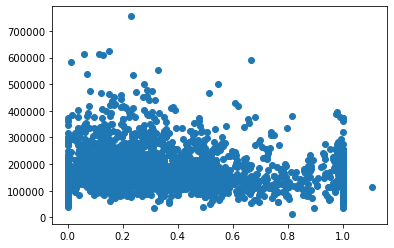

In [40]:
#not the prettiest correlation of %unfinished basement/grlivarea
plt.scatter(((ahp['BsmtUnfSF']/ahp['GrLivArea'])),ahp['SalePrice'])
#*(ahp['TotalBsmtSF']/ahp['GrLivArea'])

In [120]:
ahp.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   
4         70.0     8400   Pave   NaN      Reg         Lvl    AllPub    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl        SWISU       Norm       Norm     1Fam     1Story   
1       Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3       Gtl      OldTown       Norm       Norm     1Fam     2Story   
4       Gtl       NWAmes       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            9       1930          2007       Hip  CompShg   
3            4            8       1900          2003     Gable  CompShg   
4            8            6       2001          2001     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        Gd   
4     VinylSd     VinylSd       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     BrkTil       TA       TA           No          ALQ       737.0   
3     BrkTil       Fa       TA           No          Unf         0.0   
4      PConc       Gd       TA           No          GLQ       643.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          Unf         0.0      100.0        837.0    GasA        Ex   
3          Unf         0.0      405.0        405.0    GasA        Gd   
4          Unf         0.0      167.0        810.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1001         0             0           0.0   
3          Y      SBrkr       717       322             0           0.0   
4          Y      SBrkr       810       855             0           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         1         0             2             1          Gd   
3           0.0         1         0             2             1          TA   
4           0.0         2         1             3             1         

In [41]:
#has basement yes=1 - will use for interaction term later to see if it impacts model
ahp['Bsmt_Y']=np.where(ahp['TotalBsmtSF']>0,1,0)

In [42]:
#outdoor space sf total
ahp['OutdoorSpace']=ahp['WoodDeckSF']+ahp['OpenPorchSF']+ahp['EnclosedPorch']+ahp['3SsnPorch']

In [43]:
#age sold only years going to use month as separate predictor
ahp['AgeSold']=ahp['YrSold']-ahp['YearRemodAdd']

# Clean data set

In [44]:
#new copy of the data set before dropping columns
ahp_cleaned=ahp.copy()

In [45]:
#Left PID so we can drop the house identified by chad before proceeding
ahp_cleaned.drop(columns=['Unnamed: 0','PoolArea','PoolQC','MiscFeature','MiscVal','EnclosedPorch','3SsnPorch',\
                         'ScreenPorch','WoodDeckSF','OpenPorchSF','Electrical','YearBuilt','YearRemodAdd',\
                          'GarageYrBlt','Fence','BsmtFinType1',\
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2','Alley','Utilities'],inplace=True)

In [46]:
ahp_cleaned.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'price_sfgr', 'price_sf', 'perc_1stflr',
       'house_footprint', 'house_ga_foot

## Fixing remaining NAs

Note Lot Frontage dealt with above

In [159]:
#Looking at all columns with NAs
ahp_cleaned.isna().sum()

PID                   0
GrLivArea             0
SalePrice             0
MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
Street                0
LotShape              0
LandContour           0
LotConfig             0
LandSlope             0
Neighborhood          0
Condition1            0
Condition2            0
BldgType              0
HouseStyle            0
OverallQual           0
OverallCond           0
RoofStyle             0
RoofMatl              0
Exterior1st           0
Exterior2nd           0
MasVnrType            0
MasVnrArea            0
ExterQual             0
ExterCond             0
Foundation            0
BsmtQual              0
BsmtCond              0
BsmtExposure          0
BsmtUnfSF             0
TotalBsmtSF           0
Heating               0
HeatingQC             0
CentralAir            0
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
BsmtFullBath          0
BsmtHalfBath          0
FullBath        

In [196]:
#space to examine each variable before cleaning their NAs
ahp_cleaned[ahp_cleaned['price_sf'].isna()]

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
912  903230120        896      79000          20       RM         99.0   

     LotArea Street LotShape LandContour LotConfig LandSlope Neighborhood  \
912     5940   Pave      IR1         Lvl       FR3       Gtl      BrkSide   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
912      Feedr       Norm     1Fam     1Story            4            7   

    RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
912     Gable  CompShg     MetalSd      CBlock       None         0.0   

    ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  BsmtUnfSF  \
912        TA        TA      PConc       NA       NA           NA        0.0   

     TotalBsmtSF Heating HeatingQC CentralAir  1stFlrSF  2ndFlrSF  \
912          0.0    GasA        TA          Y       896         0   

     LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
912             0           0.0           0.0         1         0   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
912             2             1          TA             4        Typ   

     Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
912           0          NA     Detchd          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  MoSold  YrSold SaleType SaleCondition  \
912         TA         TA          Y       4    2008    ConLD       Abnorml   

     perc_1stflr  BsmtGLQSF  BsmtALQSF  BsmtBLQSF  BsmtRecSF  BsmtLwQSF  \
912          1.0        0.0        0.0        0.0        0.0        0.0   

     house_footprint  price_sfgr  price_sf  Bsmt_Y  house_ga_footprint  \
912         0.150842   88.169643       NaN       0             0.19798   

     OutdoorSpace  AgeSold  RoomSize  QualXSF  CondXSF  
912             0       58     448.0     3584     6272

In [48]:
ahp_cleaned['MasVnrType']=np.where(ahp_cleaned['MasVnrType'].isna(),'None',ahp_cleaned['MasVnrType'])
ahp_cleaned['MasVnrArea']=np.where(ahp_cleaned['MasVnrArea'].isna(),0,ahp_cleaned['MasVnrArea'])

In [49]:
ahp_cleaned['BsmtQual']=np.where(ahp_cleaned['BsmtQual'].isna(),'NA',ahp_cleaned['BsmtQual'])
ahp_cleaned['BsmtCond']=np.where(ahp_cleaned['BsmtCond'].isna(),'NA',ahp_cleaned['BsmtCond'])
ahp_cleaned['BsmtExposure']=np.where(ahp_cleaned['BsmtExposure'].isna(),'NA',ahp_cleaned['BsmtExposure'])

In [50]:
ahp_cleaned['BsmtUnfSF'].fillna(0,inplace=True)
ahp_cleaned['TotalBsmtSF'].fillna(0,inplace=True)
ahp_cleaned['BsmtFullBath'].fillna(0,inplace=True)
ahp_cleaned['BsmtHalfBath'].fillna(0,inplace=True)

In [51]:
ahp_cleaned['FireplaceQu'].fillna('NA',inplace=True)
ahp_cleaned['GarageType'].fillna('NA',inplace=True)
ahp_cleaned['GarageFinish'].fillna('NA',inplace=True)
ahp_cleaned['GarageQual'].fillna('NA',inplace=True)
ahp_cleaned['GarageCond'].fillna('NA',inplace=True)
ahp_cleaned['GarageCars'].fillna(0,inplace=True)

In [52]:
ahp_cleaned['price_sf'].fillna((ahp_cleaned['SalePrice']/(ahp_cleaned['GrLivArea']+ahp_cleaned['TotalBsmtSF'])),inplace=True)
ahp['price_sf'].fillna((ahp['SalePrice']/(ahp['GrLivArea']+ahp['TotalBsmtSF'])),inplace=True)

In [53]:
ahp_cleaned['BsmtExposure'].unique()

array(['No', 'Mn', 'NA', 'Gd', 'Av'], dtype=object)

In [158]:
ahp_cleaned.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'price_sfgr', 'price_sf', 'perc_1stflr',
       'house_footprint', 'house_ga_foot

In [178]:
ahp_cleaned.to_csv('Ames_HousePrice_James_New_Features.csv')

In [180]:
len(ahp_cleaned[ahp_cleaned['BsmtQual']=='NA'])

69

# Dummification

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [56]:
cl_y=ahp_cleaned['SalePrice']

In [57]:
cl_x=ahp_cleaned.loc[:,ahp_cleaned.columns!='SalePrice']

In [58]:
cl_x_dummies = pd.get_dummies(cl_x, columns=['MSSubClass','MSZoning','LotShape','LandContour',\
        'LotConfig', 'LandSlope','Neighborhood', 'BldgType', 'HouseStyle','MasVnrType', 'ExterQual', \
        'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure',
       'HeatingQC','CentralAir','KitchenQual','Condition1','Condition2',\
        'GarageType','PavedDrive','SaleCondition','SaleType','MoSold','GarageQual', 'GarageCond','GarageFinish',\
        'FireplaceQu','Heating','RoofStyle','RoofMatl','Street','Functional','Exterior1st','Exterior2nd'],\
        prefix=['MSSubClass','MSZoning','LotShape','LandContour',\
        'LotConfig', 'LandSlope','Neighborhood', 'BldgType', 'HouseStyle','MasVnrType', 'ExterQual', \
        'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure',
       'HeatingQC','CentralAir','KitchenQual','Condition1','Condition2',\
        'GarageType','PavedDrive','SaleCondition','SaleType','MoSold','GarageQual', 'GarageCond','GarageFinish',\
        'FireplaceQu','Heating','RoofStyle','RoofMatl','Street','Functional','Exterior1st','Exterior2nd'],\
                               prefix_sep='_',drop_first=True)

In [59]:
cl_x_dummies.head()

PID  GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  \
0  909176150        856         65.0     7890            6            6   
1  905476230       1049         42.0     4235            5            5   
2  911128020       1001         60.0     6060            5            9   
3  535377150       1039         80.0     8146            4            8   
4  534177230       1665         70.0     8400            8            6   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0      618.0        856.0       856         0             0   
1       149.0      104.0       1049.0      1049         0             0   
2         0.0      100.0        837.0      1001         0             0   
3         0.0      405.0        405.0       717       322             0   
4         0.0      167.0        810.0       810       855             0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         1         0             2             1   
1           1.0           0.0         2         0             2             1   
2           0.0           0.0         1         0             2             1   
3           0.0           0.0         1         0             2             1   
4           1.0           0.0         2         1             3             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  YrSold  price_sfgr  \
0             4           1         2.0       399.0    2010  147.196262   
1             5           0         1.0       266.0    2009  132.983794   
2             5           0         1.0       216.0    2007  124.775225   
3             6           0         1.0       281.0    2009  109.720885   
4             6           0         2.0       528.0    2009  136.336336   

    price_sf  perc_1stflr  house_footprint  house_ga_footprint    RoomSize  \
0  73.598131     1.000000         0.108492            0.159062  214.000000   
1  66.491897     1.000000         0.247698            0.310508  209.800000   
2  67.954298     1.000000         0.165182            0.200825  200.200000   
3  78.947368     0.690087         0.088019            0.122514  173.166667   
4  91.717172     0.486486         0.096429            0.159286  277.500000   

   QualXSF  CondXSF  BsmtGLQSF  BsmtALQSF  BsmtBLQSF  BsmtRecSF  BsmtLwQSF  \
0     5136     5136        0.0        0.0        0.0      238.0        0.0   
1     5245     5245      552.0      393.0        0.0        0.0        0.0   
2     5005     9009        0.0      737.0        0.0        0.0        0.0   
3     4156     8312        0.0        0.0        0.0        0.0        0.0   
4    13320     9990      643.0        0.0        0.0        0.0        0.0   

   Bsmt_Y  OutdoorSpace  AgeSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       1             0       60              1              0              0   
1       1           105       25              0              0              0   
2       1           282        0              1              0              0   
3       1           168        6              0              0              0   
4       1            45        8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_150  \
0              0              0               0               0   
1              0              0               1               0   
2              0              0               0               

In [60]:
x_train, x_test, y_train, y_test = train_test_split(cl_x_dummies, cl_y, test_size=0.3, random_state=247,\
                        shuffle=True)

In [235]:
y_train_arr = np.array(y_train)

In [280]:
x_train.isna().sum().sort_values()

PID                        0
GarageType_NA              0
PavedDrive_P               0
PavedDrive_Y               0
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
SaleType_CWD               0
SaleType_Con               0
SaleType_ConLD             0
SaleType_ConLI             0
SaleType_ConLw             0
SaleType_New               0
SaleType_Oth               0
SaleType_VWD               0
SaleType_WD                0
MoSold_2                   0
MoSold_3                   0
MoSold_4                   0
MoSold_5                   0
MoSold_6                   0
MoSold_7                   0
MoSold_8                   0
MoSold_9                   0
MoSold_10                  0
MoSold_11                  0
MoSold_12                  0
GarageQual_Fa              0
GarageType_Detchd          0
GarageQual_Gd              0
GarageType_CarPort         0
GarageType_Basment         0
BsmtExposure_G

In [263]:
np.isinf(x_train).sum().sort_values()

PID                      0
HeatingQC_Po             0
HeatingQC_Gd             0
HeatingQC_Fa             0
BsmtExposure_No          0
BsmtExposure_NA          0
BsmtExposure_Mn          0
BsmtExposure_Gd          0
BsmtCond_TA              0
BsmtCond_Po              0
HeatingQC_TA             0
BsmtCond_NA              0
BsmtCond_Fa              0
BsmtQual_TA              0
BsmtQual_Po              0
BsmtQual_NA              0
BsmtQual_Gd              0
BsmtQual_Fa              0
Foundation_Wood          0
Foundation_Stone         0
Foundation_Slab          0
BsmtCond_Gd              0
Foundation_PConc         0
CentralAir_Y             0
KitchenQual_Gd           0
GarageType_BuiltIn       0
GarageType_Basment       0
GarageType_Attchd        0
Condition2_RRNn          0
Condition2_RRAn          0
Condition2_RRAe          0
Condition2_PosN          0
Condition2_PosA          0
Condition2_Norm          0
KitchenQual_Fa           0
Condition2_Feedr         0
Condition1_RRNe          0
C

In [264]:
x_train[x_train['BedroomAbvGr']==0]

PID  GrLivArea  LotArea  OverallQual  OverallCond  MasVnrArea  \
779   923203010        936     6710            6            5       134.0   
1421  905200490        960    10246            4            9         0.0   
1864  535377090       1056     6979            6            5         0.0   
1626  906475170       1743    20064            8            6         0.0   
347   533350050       1842    50271            9            5         0.0   
1960  905325030       1524    23595            7            6         0.0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
779         0.0        920.0       936         0             0           2.0   
1421        0.0        648.0       960         0             0           1.0   
1864        0.0       1056.0      1056         0             0           2.0   
1626        0.0        966.0      1743         0             0           2.0   
347        32.0       1842.0      1842         0             0           2.0   
1960       74.0       1332.0      1332       192             0           2.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
779            0.0         0         1             0             1   
1421           1.0         0         0             0             1   
1864           0.0         0         0             0             2   
1626           0.0         0         1             0             1   
347            0.0         0         1             0             1   
1960           0.0         0         1             0             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  YrSold  perc_1stflr  \
779              3           0         2.0       460.0    2007     1.000000   
1421             3           0         1.0       364.0    2006     1.000000   
1864             4           0         2.0       576.0    2010     1.000000   
1626             5           2         2.0       529.0    2007     1.000000   
347              5           1         3.0       894.0    2006     1.000000   
1960             4           1         2.0       586.0    2010     0.874016   

      BsmtGLQSF  BsmtALQSF  BsmtBLQSF  BsmtRecSF  BsmtLwQSF  house_footprint  \
779       904.0        0.0        0.0       16.0        0.0         0.139493   
1421      648.0        0.0        0.0        0.0        0.0         0.093695   
1864     1056.0        0.0        0.0        0.0        0.0         0.151311   
1626      915.0        0.0        0.0        0.0       51.0         0.086872   
347      1810.0        0.0        0.0        0.0        0.0         0.036641   
1960     1258.0        0.0        0.0        0.0        0.0         0.056453   

      price_sfgr    price_sf  Bsmt_Y  house_ga_footprint  OutdoorSpace  \
779   149.572650   75.431034       1            0.208048            40   
1421  151.041667   90.174129       1            0.129221            88   
1864  136.363636   68.181818       1            0.233844           320   
1626  160.068847  102.990033       1            0.113238           646   
347   209.011944  104.505972       1            0.054425           929   
1960  170.603675   91.036415       1            0.081288           268   

      AgeSold  RoomSize  QualXSF  CondXSF  MSSubClass_30  MSSubClass_40  \
779        10       inf     5616     4680              0              0   
1421        5       inf     3840     8640              0              0   
1864       30       inf     6336     5280              0              0   
1626       31       inf    13944    10458              0              0   
347        19       inf    16578     9210              0              0   
1960       31       inf    10668     9144              0              1   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
779               0              0              0              0   
1421              0              0              0              0   
1864              0              0              0       

In [166]:
len(y_train)
len(X_add_const)

1806

In [168]:
X_add_const = sm.add_constant(scaled_x)
ols = sm.OLS(list(y_train), X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     384.1
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        17:24:48   Log-Likelihood:                -19073.
No. Observations:                1806   AIC:                         3.866e+04
Df Residuals:                    1550   BIC:                         4.007e+04
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.773e+

In [68]:
together = pd.concat([pd.DataFrame(y_train,columns=['SalePrice']),x_train],axis=1)

In [69]:
together.head()

SalePrice        PID  GrLivArea  LotFrontage  LotArea  OverallQual  \
2104     236500  527146030       1616         39.0     5389            8   
2236     137500  909279040       1180         80.0    11600            4   
1983     119000  902206130       1251         50.0     6900            6   
1107     160000  534403280       1251         80.0     8800            6   
299      126000  910205010       1656         75.0     6000            5   

      OverallCond  MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
2104            5         0.0      415.0       1595.0      1616         0   
2236            5         0.0      700.0        700.0      1180         0   
1983            7         0.0      827.0        827.0       827       424   
1107            6       425.0      698.0       1251.0      1251         0   
299             5         0.0      367.0        624.0      1092       564   

      LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
2104             0           1.0           0.0         2         0   
2236             0           0.0           0.0         1         0   
1983             0           0.0           0.0         1         0   
1107             0           1.0           0.0         1         0   
299              0           0.0           0.0         1         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
2104             2             1             5           1         2.0   
2236             2             1             5           1         1.0   
1983             3             1             6           0         1.0   
1107             3             1             6           2         1.0   
299              3             1             7           1         1.0   

      GarageArea  YrSold  price_sfgr   price_sf  perc_1stflr  house_footprint  \
2104       608.0    2010  146.349010  73.653068     1.000000         0.299870   
2236       252.0    2006  116.525424  73.138298     1.000000         0.101724   
1983       240.0    2010   95.123901  57.266603     0.661071         0.119855   
1107       461.0    2006  127.897682  63.948841     1.000000         0.142159   
299        288.0    2008   76.086957  55.263158     0.659420         0.182000   

      house_ga_footprint    RoomSize  QualXSF  CondXSF  BsmtGLQSF  BsmtALQSF  \
2104            0.412693  323.200000    12928     8080     1180.0        0.0   
2236            0.123448  236.000000     4720     5900        0.0        0.0   
1983            0.154638  208.500000     7506     8757        0.0        0.0   
1107            0.194545  208.500000     7506     7506        0.0        0.0   
299             0.230000  236.571429     8280     8280        0.0        0.0   

      BsmtBLQSF  BsmtRecSF  BsmtLwQSF  Bsmt_Y  OutdoorSpace  AgeSold  \
2104        0.0        0.0        0.0       1           389       14   
2236        0.0        0.0        0.0       1            67       56   
1983        0.0        0.0        0.0       1             0       10   
1107      553.0        0.0        0.0       1           116       42   
299         0.0      257.0        0.0       1           180       41   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
2104              0              0              0              0   
2236              1              0              0              0   
1983              0              0              1              0   
1107              0              0              0              0   
299               0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
2104              0              0              0              0   
2236              0              0              0              0   
1983              0              0              0              0   
1107              0              0              0              0   
299               0              0              0              1   

 

In [140]:
simple_mod = smf.ols(formula='SalePrice ~ 1 +  QualXSF + house_ga_footprint + OutdoorSpace + AgeSold + BsmtGLQSF + perc_1stflr + GarageArea', data=together)

res = simple_mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1522.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        16:48:57   Log-Likelihood:                -21084.
No. Observations:                1806   AIC:                         4.218e+04
Df Residuals:                    1798   BIC:                         4.223e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.514e+04   4198

In [101]:
scaled_x = pd.DataFrame(StandardScaler().fit_transform(X=x_train,y=y_train),columns=x_train.columns)

In [102]:
scaled_x.head()

PID  GrLivArea  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.001335   0.285856    -0.737457 -0.542954     1.434084    -0.553364   
1  1.023845  -0.622686     0.190391  0.172934    -1.493247    -0.553364   
2  0.986361  -0.474735    -0.488522 -0.368794    -0.029581     1.236028   
3 -0.962874  -0.474735     0.190391 -0.149798    -0.029581     0.341332   
4  1.028753   0.369209     0.077239 -0.472529    -0.761414    -0.553364   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   -0.568795  -0.287874     1.313528  1.240227 -0.796237      -0.09348   
1   -0.568795   0.382404    -0.788509  0.093898 -0.796237      -0.09348   
2   -0.568795   0.681089    -0.490231 -0.834207  0.224020      -0.09348   
3    1.908822   0.377700     0.505594  0.280571 -0.796237      -0.09348   
4   -0.568795  -0.400763    -0.967006 -0.137471  0.560897      -0.09348   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      1.082971     -0.260822  0.831461 -0.753427     -1.020119      -0.19356   
1     -0.840181     -0.260822 -1.008758 -0.753427     -1.020119      -0.19356   
2     -0.840181     -0.260822 -1.008758 -0.753427      0.199163      -0.19356   
3      1.082971     -0.260822 -1.008758 -0.753427      0.199163      -0.19356   
4     -0.840181     -0.260822 -1.008758  1.250534      0.199163      -0.19356   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea    YrSold  price_sfgr  \
0     -0.900025    0.649941    0.352372    0.689686  1.648237    0.829151   
1     -0.900025    0.649941   -1.007422   -1.038523 -1.404805   -0.138288   
2     -0.240883   -0.906814   -1.007422   -1.096778  1.648237   -0.832526   
3     -0.240883    2.206696   -1.007422   -0.023929 -1.404805    0.230614   
4      0.418260    0.649941   -1.007422   -0.863761  0.121716   -1.450061   

   price_sf  perc_1stflr  house_footprint  house_ga_footprint  RoomSize  \
0  0.233528     0.854936         2.193174            2.081870  2.029634   
1  0.199838     0.854936        -0.489384           -0.676647  0.102917   
2 -0.838913    -0.652647        -0.243922           -0.379194 -0.504705   
3 -0.401582     0.854936         0.058036            0.001406 -0.504705   
4 -0.970032    -0.659991         0.597414            0.339535  0.115543   

    QualXSF   CondXSF  BsmtGLQSF  BsmtALQSF  BsmtBLQSF  BsmtRecSF  BsmtLwQSF  \
0  0.780279 -0.055830   2.188774  -0.405493  -0.324876  -0.330430   -0.23749   
1 -0.986893 -0.758293  -0.561835  -0.405493  -0.324876  -0.330430   -0.23749   
2 -0.387071  0.162320  -0.561835  -0.405493  -0.324876  -0.330430   -0.23749   
3 -0.387071 -0.240791  -0.561835  -0.405493   2.652337  -0.330430   -0.23749   
4 -0.220429  0.008616  -0.561835  -0.405493  -0.324876   1.077068   -0.23749   

     Bsmt_Y  OutdoorSpace   AgeSold  MSSubClass_30  MSSubClass_40  \
0  0.168742      1.428548 -0.494932      -0.226324       -0.05269   
1  0.168742     -0.653502  1.556186       4.418453       -0.05269   
2  0.168742     -1.086724 -0.690277      -0.226324       -0.05269   
3  0.168742     -0.336669  0.872480      -0.226324       -0.05269   
4  0.168742      0.077155  0.823644      -0.226324       -0.05269   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0      -0.078282      -0.340871      -0.492027      -0.219481      -0.088388   
1      -0.078282      -0.340871      -0.492027      -0.219481      -0.088388   
2      12.774264      -0.340871      -0.492027      -0.219481      -0.088388   
3      -0.078282      -0.340871      -0.492027      -0.219481      -0.088388   
4      -0.078282      -0.340871      -0.492027      -0.219481      -0.088388   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0      -0.202292      -0.132154       -0.17723        3.816931   
1      -0.202292      -0.132154       -0.17723       -0.261991   
2      -0.202292      -0.132154       -0.17723       -0.261991   
3      -0.202292      -0.132154       -0.17723       -0.261991  

In [112]:
scaled_x_fewer = scaled_x.copy()

In [177]:
scaled_x_fewer.columns

Index(['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD'],
      dtype='object', length=170)

In [172]:
scaled_x_fewer.drop(columns=['GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',\
       'GarageCond_NA', 'GarageCond_Po', 'GarageCond_TA', 'GarageFinish_NA',\
       'GarageFinish_RFn', 'GarageFinish_Unf','MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',\
       'MoSold_11', 'MoSold_12', 'GarageQual_Fa', 'GarageQual_Gd',\
       'GarageQual_NA','SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',\
       'SaleType_VWD', 'SaleType_WD ', 'MoSold_2', 'MoSold_3', 'MoSold_4',\
       'MoSold_5'],inplace=True)

In [176]:
scaled_x_fewer.drop(columns=['SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',\
       'SaleType_VWD', 'SaleType_WD ', 'MoSold_2', 'MoSold_3', 'MoSold_4',\
       'MoSold_5'],inplace=True)

In [134]:
lasso=Lasso()
alphas = np.linspace(1,100000,200)
lasso.set_params(normalize=False)
lasso_coefs  = []
lasso_scores = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(scaled_x_fewer, y_train)  
        lasso_coefs.append(lasso.coef_)
        
        lasso_scores.append(lasso.score(scaled_x_fewer, y_train))
lasso_coefs = pd.DataFrame(lasso_coefs, index = alphas, columns = scaled_x_fewer.columns)  
lasso_coefs.head()

/Users/jamesreno/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230278173660.0169, tolerance: 1011405019.3030663
  model = cd_fast.enet_coordinate_descent(


LotFrontage      LotArea  OverallCond   MasVnrArea   BsmtUnfSF  \
1.000000    -3237.083954  5550.754515  5807.925780  2198.734715  322.515640   
503.507538  -1158.993194  3942.423415  4332.556021  2002.307413 -267.074705   
1006.015075    -0.000000  2879.027441  3648.733846  2146.330125   -0.000000   
1508.522613    -0.000000  2644.588750  3077.421304  2122.529204   -0.000000   
2011.030151     0.000000  2566.851295  2392.919814  1987.165544   -0.000000   

             TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
1.000000     7191.475585 -1874.897908 -3075.136704   -405.300848   
503.507538   8464.698643  1227.497360    -0.000000     -0.000000   
1006.015075  7943.492135  1525.404737    -0.000000     -0.000000   
1508.522613  7937.928021  2082.147422    -0.000000     -0.000000   
2011.030151  8082.046131  1984.853727    -0.000000     -0.000000   

             BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
1.000000       496.025809    160.332986  1747.120663  2557.181741   
503.507538      19.321997     -0.000000     0.000000  1225.851079   
1006.015075      0.000000     -0.000000     0.000000    90.853222   
1508.522613      0.000000     -0.000000     0.000000     0.000000   
2011.030151      0.000000     -0.000000     0.000000     0.000000   

             BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
1.000000     -1717.114264  -2072.148191   8633.799988  3523.072972   
503.507538    -804.692979  -1775.084861    665.570116  4366.638245   
1006.015075   -321.702077  -2001.093918      0.000000  4406.977954   
1508.522613     -0.000000  -2147.299373      0.000000  4294.664467   
2011.030151     -0.000000  -1977.444130      0.000000  4201.578439   

              GarageArea  perc_1stflr  house_ga_footprint     RoomSize  \
1.000000     6325.441015 -2679.042852        -3844.716279  5570.486749   
503.507538   6219.342523     0.000000        -2891.712118     0.000000   
1006.015075  6252.568895     0.000000        -3071.301933    -0.000000   
1508.522613  6383.042648     0.000000        -2946.689469     0.000000   
2011.030151  6346.041618     0.000000        -2065.018410     0.000000   

                  QualXSF     BsmtGLQSF    BsmtALQSF    BsmtBLQSF  \
1.000000     25100.386191  10846.653917  3422.154007  1405.969604   
503.507538   34232.805609  10710.525142  2234.754580     0.000000   
1006.015075  36603.080471  11532.853622  1966.591280     0.000000   
1508.522613  36698.312835  11499.166146  1409.751873     0.000000   
2011.030151  37200.809739  11346.222034   926.185080     0.000000   

               BsmtRecSF  BsmtLwQSF       Bsmt_Y  OutdoorSpace      AgeSold  \
1.000000     1048.121965  37.730506 -2279.814448    -22.967554 -1308.952013   
503.507538      0.000000  -0.000000    -0.000000      0.000000 -3237.848732   
1006.015075     0.000000  -0.000000    -0.000000      0.000000 -3827.104966   
1508.522613    -0.000000  -0.000000    -0.000000      0.000000 -4077.607583   
2011.030151    -0.000000  -0.000000    -0.000000      0.000000 -4406.173561   

             MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1.000000       -696.535075     -71.798366    1112.478901   -1195.788393   
503.507538     -673.651908      -0.000000       0.000000      -0.000000   
1006.015075     -48.125232      -0.000000      -0.000000      -0.000000   
1508.522613      -0.000000      -0.000000      -0.000000      -0.000000   
2011.030151      -0.000000       0.000000      -0.000000      -0.000000   

             MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1.000000       -371.235249    -500.192660     559.394561   -3015.337932   
503.507538        0.000000      -7.683363       0.000000    -149.963951   
1006.015075       0.000000      -0.000000       0.000000      -0.000000   
1508.522613       0.000000      -0.000000       0.000000      -0.000000   
2011.030151       0.000000      -0.000000       0.000000      -0.000000   

             MSSubClass_85  MSSubClass_90  MSSubClass_12

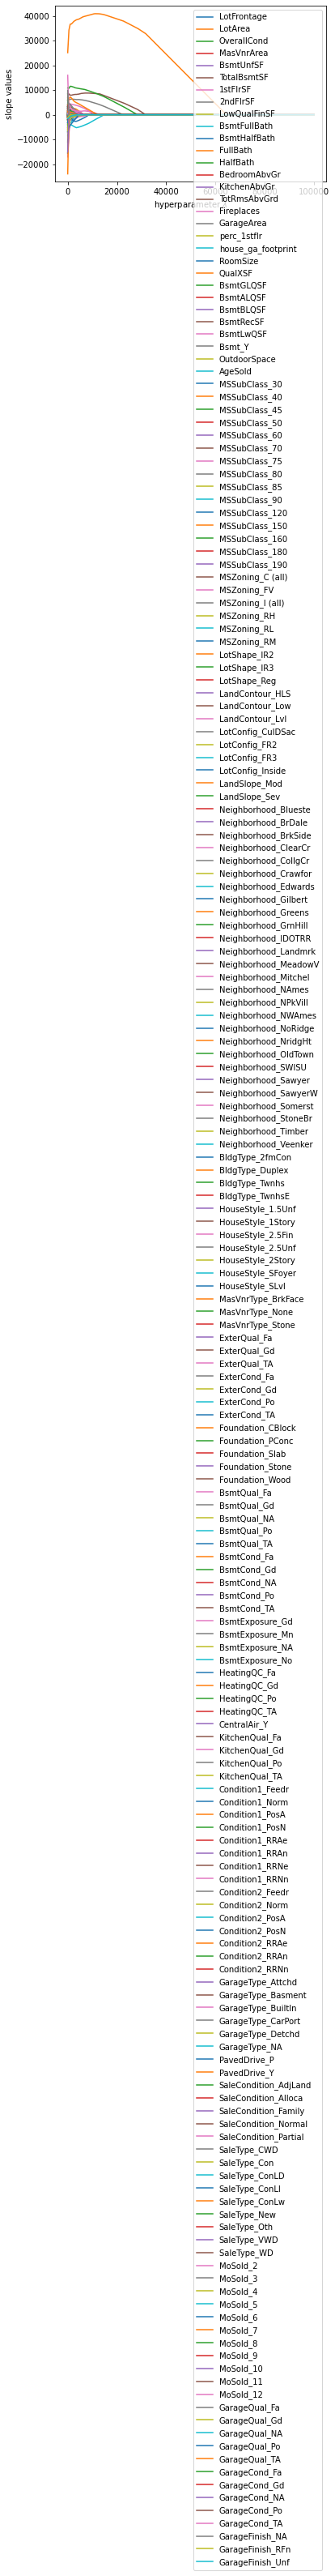

In [135]:
for name in lasso_coefs.columns:
    plt.plot(lasso_coefs.index, lasso_coefs[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1) 

In [141]:
lasso_coefs.index

Float64Index([               1.0,  503.5075376884422, 1006.0150753768844,
              1508.5226130653266, 2011.0301507537688,  2513.537688442211,
               3016.045226130653,  3518.552763819095, 4021.0603015075376,
                4523.56783919598,
              ...
               95477.43216080402,  95979.93969849245,   96482.4472361809,
               96984.95477386935,  97487.46231155779,  97989.96984924623,
               98492.47738693467,  98994.98492462312,  99497.49246231155,
                        100000.0],
             dtype='float64', length=200)

In [156]:
lasso_coefs[((lasso_coefs.index>=6000)&(lasso_coefs.index<15000))].transpose()

6031.090452   6533.597990   7036.105528   7538.613065   \
LotFrontage                0.000000      0.000000      0.000000      0.000000   
LotArea                  460.467059    105.211263      0.000000      0.000000   
OverallCond                0.000000      0.000000      0.000000      0.000000   
MasVnrArea               108.274730      0.000000      0.000000      0.000000   
BsmtUnfSF                 -0.000000     -0.000000     -0.000000     -0.000000   
TotalBsmtSF             8703.082795   8748.954003   8794.042616   8800.221109   
1stFlrSF                1531.076894   1593.163034   1591.519872   1526.900193   
2ndFlrSF                  -0.000000     -0.000000     -0.000000     -0.000000   
LowQualFinSF              -0.000000     -0.000000     -0.000000     -0.000000   
BsmtFullBath               0.000000      0.000000      0.000000      0.000000   
BsmtHalfBath               0.000000      0.000000      0.000000      0.000000   
FullBath                   0.000000      0.000000      0.000000      0.000000   
HalfBath                   0.000000      0.000000      0.000000      0.000000   
BedroomAbvGr              -0.000000     -0.000000     -0.000000     -0.000000   
KitchenAbvGr              -0.000000     -0.000000     -0.000000     -0.000000   
TotRmsAbvGrd               0.000000      0.000000      0.000000      0.000000   
Fireplaces              2927.770530   2719.491541   2472.509348   2169.755609   
GarageArea              6006.872867   5930.685863   5830.780054   5724.154737   
perc_1stflr                0.000000      0.000000      0.000000      0.000000   
house_ga_footprint        -0.000000     -0.000000     -0.000000     -0.000000   
RoomSize                   0.000000      0.000000      0.000000      0.000000   
QualXSF                39494.178183  39689.205080  39816.889667  39953.467526   
BsmtGLQSF              10402.946427  10315.190108  10219.252772  10058.344058   
BsmtALQSF                  0.000000      0.000000      0.000000      0.000000   
BsmtBLQSF                  0.000000      0.000000     -0.000000     -0.000000   
BsmtRecSF                 -0.000000     -0.000000     -0.000000     -0.000000   
BsmtLwQSF                 -0.000000     -0.000000     -0.000000     -0.000000   
Bsmt_Y                     0.000000      0.000000      0.000000      0.000000   
OutdoorSpace               0.000000      0.000000      0.000000      0.000000   
AgeSold                -4463.250002  -4255.915597  -4051.896217  -3843.558422   
MSSubClass_30             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_40             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_45             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_50             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_60              0.000000      0.000000      0.000000      0.000000   
MSSubClass_70             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_75             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_80             -0.000000      0.000000      0.000000      0.000000   
MSSubClass_85              0.000000      0.000000      0.000000      0.000000   
MSSubClass_90             -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_120            -0.000000      0.000000      0.000000      0.000000   
MSSubClass_150            -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_160            -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_180            -0.000000     -0.000000     -0.000000     -0.000000   
MSSubClass_190            -0.000000     -0.000000     -0.000000     -0.000000   
MSZoning_C (all)          -0.000000     -0.000000     -0.000000     -0.000000   
MSZoning_FV                0.000000      0.000000      0.000000      0.000000   
MSZoning_I (all)          -0.000000     -0.000000     -0.000000     -0.000000   
MSZoning_RH               -0.000000     -0.000000     

In [87]:
lasso_scores[19]

0.9719726857978835